In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
dataset = pd.read_csv('/content/drive/MyDrive/MachineLearning/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [52]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(x)
print(y)

[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [65.  1.  4. ...  2.  1.  7.]
 [48.  1.  4. ...  1.  2.  7.]
 [63.  0.  4. ...  2.  3.  7.]]
[0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1
 0 0 0 1 1 1 1]


In [53]:
# split data into train & validation (80 -- 20)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size=0.2)

In [54]:
Features = dataset.drop('target', axis=1)
Target_data = dataset['target']

In [55]:
Features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [56]:
# this function take an selected features and raw data and just returns the data which is 1 in selected_features
def select_features(x_train, selected_features):
    selected_indices = [i for i, val in enumerate(selected_features) if val == 1]
    selected_data = []
    for j in x_train:
        selected_row = [j[i] for i in selected_indices]
        selected_data.append(selected_row)
    selected_data = np.array(selected_data)
    return selected_data

In [57]:
#define a function to evaluate the fitness of a feature subset using random forest & LogisticRegression classifier
from sklearn.svm import SVC

def fitness_function(features):

    #train a random forest classifier with the subset of features
    #RFclf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=3)
    #lr = LogisticRegression(max_iter=5000, random_state=42)
    svm_b = SVC(kernel='linear', random_state=1, probability=True)



    x_train_selected = select_features(x_train,features)
    x_val_selected = select_features(x_val,features)

    #RFclf.fit(x_train_selected, y_train)
    #lr.fit(x_train_selected, y_train)
    svm_b.fit(x_train_selected, y_train)


    #calculate the fitness score
    fitness = svm_b.score(x_val_selected, y_val)

    #return the fitness score
    return fitness

In [58]:
#Defining the population size.
population_size = 50

#Number of generations
n_generations = 50

#Mutation probability
mutation_rate = 0.1

In [59]:
population = np.random.randint(low=0, high=2, size=(population_size, Features.shape[1]))

In [60]:
population

array([[1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [61]:
fitness_function(population[0])

0.7959183673469388

In [62]:
#defining the fitness score for each individual in the population
fitness_scores = [fitness_function(features) for features in population]

fitness_scores

[0.7959183673469388,
 0.8979591836734694,
 0.9183673469387755,
 0.9591836734693877,
 0.9183673469387755,
 0.9183673469387755,
 0.9183673469387755,
 0.7959183673469388,
 0.9183673469387755,
 0.9183673469387755,
 0.8775510204081632,
 0.8367346938775511,
 0.9183673469387755,
 0.8571428571428571,
 0.9183673469387755,
 0.8367346938775511,
 0.7959183673469388,
 0.8775510204081632,
 0.8775510204081632,
 0.8775510204081632,
 0.9795918367346939,
 0.8979591836734694,
 0.8571428571428571,
 0.7959183673469388,
 0.8571428571428571,
 0.9795918367346939,
 0.8367346938775511,
 0.8775510204081632,
 0.8979591836734694,
 0.7959183673469388,
 0.8775510204081632,
 0.7959183673469388,
 0.9183673469387755,
 0.8979591836734694,
 0.8571428571428571,
 0.9183673469387755,
 0.9183673469387755,
 0.8979591836734694,
 0.9183673469387755,
 0.8775510204081632,
 0.8979591836734694,
 0.7959183673469388,
 0.9387755102040817,
 0.8571428571428571,
 0.9183673469387755,
 0.8775510204081632,
 0.8367346938775511,
 0.9591836734

In [63]:
# Iterate through the generations
for generation in range(n_generations):

    # Print the generation number
    print("Generation : ", generation)

    # Create an empty list for new population
    new_population = []

    # Create new popualtion generating two children at a time
    for i in range(0, population_size, 2):

        # Select the parents using tournament selection ,tournament selection is a function that selects the best individual from a random subset of the population

        parent_1 = population[np.random.randint(0, population_size)]
        parent_2 = population[np.random.randint(0, population_size)]

        # Perform crossover
        cross_point = np.random.randint(0, Features.shape[1])
        child_1 = np.concatenate((parent_1[:cross_point], parent_2[cross_point:]))
        child_2 = np.concatenate((parent_2[:cross_point], parent_1[cross_point:]))

        # Perform mutation
        for i in range(Features.shape[1]):
            if np.random.random() <= mutation_rate:
                child_1[i] = 1 - child_1[i]
            if np.random.random() <= mutation_rate:
                child_2[i] = 1 - child_2[i]

        # Add the children to the new population
        new_population.append(child_1)
        new_population.append(child_2)

    # Calculate the fitness score for the new population
    new_fitness_scores = [fitness_function(features) for features in new_population]

    # Replace the old population with the new one
    population = new_population
    fitness_scores = new_fitness_scores

    # Print the best result for the current generation
    print("Best Fitness Score : ", np.max(fitness_scores))

Generation :  0
Best Fitness Score :  0.9795918367346939
Generation :  1
Best Fitness Score :  0.9591836734693877
Generation :  2
Best Fitness Score :  1.0
Generation :  3
Best Fitness Score :  0.9591836734693877
Generation :  4
Best Fitness Score :  0.9591836734693877
Generation :  5
Best Fitness Score :  0.9591836734693877
Generation :  6
Best Fitness Score :  0.9795918367346939
Generation :  7
Best Fitness Score :  0.9795918367346939
Generation :  8
Best Fitness Score :  1.0
Generation :  9
Best Fitness Score :  0.9795918367346939
Generation :  10
Best Fitness Score :  0.9795918367346939
Generation :  11
Best Fitness Score :  0.9591836734693877
Generation :  12
Best Fitness Score :  0.9591836734693877
Generation :  13
Best Fitness Score :  0.9591836734693877
Generation :  14
Best Fitness Score :  0.9795918367346939
Generation :  15
Best Fitness Score :  0.9591836734693877
Generation :  16
Best Fitness Score :  0.9591836734693877
Generation :  17
Best Fitness Score :  0.9591836734693

In [64]:
# Select the best feature subset from the final population

best_fitness_index = np.argmax(fitness_scores)

In [65]:
best_fitness_index

35

In [66]:
best_features = population[best_fitness_index]

best_features

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

In [68]:
#Train and evaluate a classifier using the selected features
#lr = LogisticRegression(max_iter=5000, random_state=42)
svm_b = SVC(kernel='linear', random_state=42, probability=True)


x_train_selected  = select_features(x_train, best_features)
xtest_selected = select_features(xtest, best_features)

svm_b.fit(x_train_selected, y_train)

y_pred = svm_b.predict(xtest_selected)


accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.819672131147541


In [69]:
best_features = population[best_fitness_index]


# Print the selected features
print("Selected Features : ")
for i in range(Features.shape[1]):
    if best_features[i] == 1:
        print(Features.columns[i])

Selected Features : 
age
sex
cp
trestbps
restecg
exang
slope
ca
thal


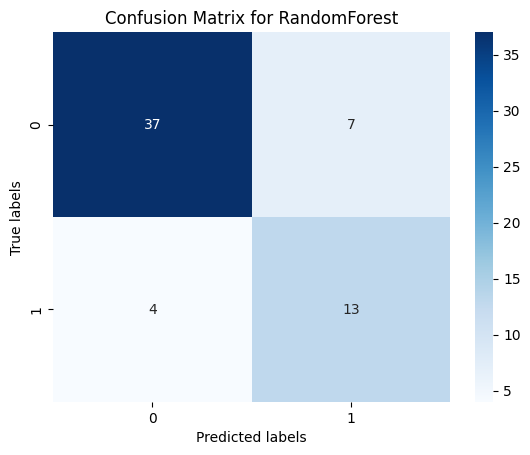

In [70]:

cm = confusion_matrix(ytest, y_pred)

# Heatmap of the confusion matrix using Seaborn
sb.heatmap(cm, annot=True, cmap="Blues", fmt = 'd')

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for RandomForest")

# Show the plot
plt.show()